In [1]:
from sashimi_w import *

m_wdm   = 5.3            # [keV]
Mhost_0 = 1.7e12            # Host halo mass at redshift = 0 [Msolar]

sh      = subhalos(m_wdm)

The function "rs_rhos_calc" under the "subhalo" class returns list of subhalos with various quantities such as mass, $r_s$, $\rho_s$, etc., both at accretion $z = z_a$ and at present $z = 0$. It also returns "weight" that is the effective number of subhalos corresponding to each "subhalo". 

In [2]:
ma200, z_a, rs_a, rhos_a, m0, rs0, rhos0, ct0, weight, survive \
    = sh.rs_rhos_calc(Mhost_0)

The function "subhalo_distr" returns the subhalo mass function. You can draw histogram of the present mass $m_0$, or at accretion $m_a$ if "accretion=True". 

In [3]:
m, dNdm = sh.subhalo_distr(Mhost_0)

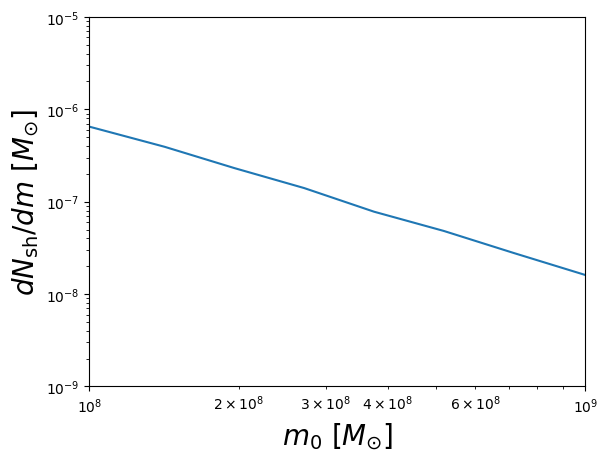

In [9]:
plt.loglog(m,dNdm)
plt.xlim(1e8,1e9)
plt.ylim(1e-9,1e-5)
plt.xlabel(r'$m_0$ [$M_{\odot}$]',fontsize=20)
plt.ylabel(r'$dN_{\rm sh}/dm$ [$M_{\odot}$]',fontsize=20)
plt.show()

The function "N_sat" returns the total number of satellites as well as the cumulative distribution of the subhalo mass function. 

In [21]:
Nsat, x, y = sh.N_sat(Mhost_0,Mpeak=1e8,Mpeak_thres=True)

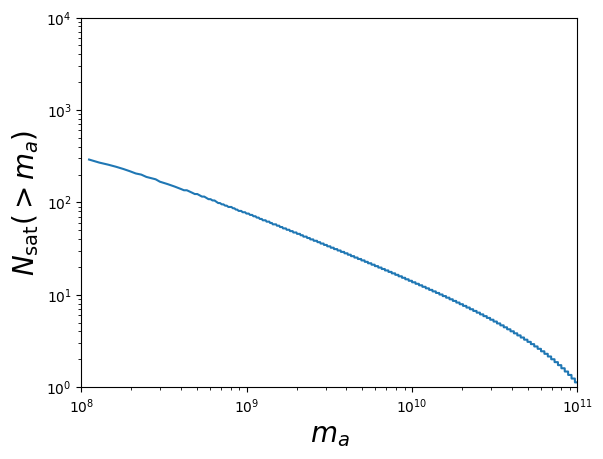

Total number of satellites with Mpeak>1e8 Msun =  290


In [23]:
plt.loglog(x,y)
plt.xlim(1e8,1e11)
plt.ylim(1,1e4)
plt.xlabel(r'$m_a$',fontsize=20)
plt.ylabel(r'$N_{\rm sat}(>m_a)$',fontsize=20)
plt.show()

print("Total number of satellites with Mpeak>1e8 Msun = ", int(Nsat))

It is possible to set a satellite forming condition on the subhalo peak mass when "Mpeak_thres=True". 

It is also possible to set a satellite forming condition on the corresponding peak circular velocity $V_{peak}$ using the function "N_sat_Vthres", or on the present maximum circular velocity $V_{max}$ if "Vpeak_thres=False". 

In [19]:
Vpeak = 18 # km/s
Nsat, x, y = sh.N_sat_Vthres(Mhost_0, Vpeak)

/var/folders/bq/ynn6pr9j74596tj_lqbgvgdr0000gn/T/ipykernel_21273/1449887670.py:2: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,70)


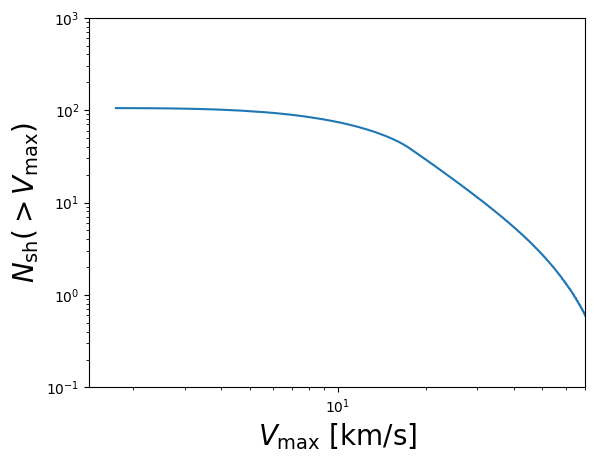

Total number of satellites =  105


In [20]:
plt.loglog(x,y)
plt.xlim(0,70)
plt.ylim(1e-1,1e3)
plt.xlabel(r'$V_{\rm max}$ [km/s]',fontsize=20)
plt.ylabel(r'$N_{\rm sh}(>V_{\rm max})$',fontsize=20)
plt.show()

print("Total number of satellites = ", int(Nsat))